In [5]:
### we will use only the human samples 

### The data is downloaded from NCBI GEO (accession code: GSE125588)

### We will follow seurat best practices to preprocess and normalize the data (https://satijalab.org/seurat/articles/pbmc3k_tutorial.html)

### libraries

library(Seurat)
library(pheatmap)


Warning message:
“package ‘Seurat’ was built under R version 4.0.5”
Attaching SeuratObject



In [6]:
setwd("~/Downloads/kpc_kpfc/")

In [7]:
files =list.files()
nam2 = files

In [8]:
### using for loop to load all the sample matrices into a single sparse matrix 

c = c()
a = Read10X(nam2[1])
c = rep(nam2[1], ncol(a))
for(i in 2:length(nam2)){
    a1 = Read10X(nam2[i])
    c = append(c, rep(nam2[i], ncol(a1)))
    a = cbind(a, a1)}

In [9]:
nam = nam2
for(i in 1:length(nam)){
    setwd(nam[i])
    files =list.files()
    new =gsub("^.+_", "", files)
    file.rename(files, new)
    setwd("..")}


In [10]:
pbmc <- CreateSeuratObject(a)
pbmc$orig.ident = c

pbmc = subset(pbmc, subset = nFeature_RNA > 100)

Warning message:
“Non-unique cell names (colnames) present in the input matrix, making unique”


In [11]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

In [13]:

pbmc <- ScaleData(pbmc, features = rownames(pbmc))


Centering and scaling data matrix



In [14]:
pb = pbmc
sc = pb@assays$RNA@scale.data
idx = colnames(sc)[which(sc["Pdpn", ] > summary(sc["Pdpn", ])[3])]

In [24]:

pbmc = subset(pb, cells = idx)
genes = c("Muc1", "Muc16", "Lrrn4", "Upk1b", "Upk3b", "Epcam", "Clu", "Onecut2","Lox","Krt7", "Xrcc6", "Cd14","Krt20", "Cldn15", "Msln", "Kcnn4", "Lrrn4", "Nkain4", "Wt1", "Krt18", "Il1b", "Tnf", "Cdh1")
ilt = pbmc
sc = pbmc@assays$RNA@scale.data
ct2 = table(pbmc$orig.ident)
mat = matrix(0, length(genes), 5)
colnames(mat) = unique(ilt$orig.ident)
rownames(mat) = genes
for(i in 1:length(genes)){
  ct = which(as.numeric(sc[genes[i], ]) > summary(as.numeric(sc[genes[i], ]))[3])
  ct = table(ilt$orig.ident[ct])
  c11 = sort(ct/ct2[names(ct)])
  mat[i, names(c11)] = as.numeric(c11)}

In [32]:
muc1 = apply(mat[c("Muc1", "Cdh1", "Cd14", "Kcnn4", "Krt7"), ], 2, median)
muc1
apply(mat[c("Muc1", "Clu"), ], 2, median)

kic_early   kic_late        KPC  kpfc_late     normal 
0.03517588 0.17283951 0.06250000 0.25925926 0.02941176

kic_early   kic_late        KPC  kpfc_late     normal 
0.16834171 0.29629630 0.18750000 0.39407407 0.09068627

In [33]:
meso = apply(mat[c("Muc16", "Upk1b", "Wt1", "Upk3b"), ], 2, median)

In [34]:
mm = rbind(muc1, meso)
pdpn = muc1
pdpn[1:5] = 1
mm = rbind(mm, pdpn)
rownames(mm) = c("Epitheloid", "Mesothelial", "PDPN-exp")
colnames(mm) = c("KIC early", "KIC late", "KPC late", "KPfC late", "Normal")

In [35]:
mm[3,1] = 1- (mm[1,1] + mm[2,1])
mm[3,2] = 1- (mm[1,2] +mm[2,2])
mm[3,3] = 1- (mm[1,3] +mm[2,3])
mm[3,4] = 1- (mm[1,4] + mm[2,4])
mm[3,5] = 1- (mm[1,5] +mm[2,5])

In [36]:
colSums(mm)
mm

KIC early  KIC late  KPC late KPfC late    Normal 
        1         1         1         1         1

,KIC early,KIC late,KPC late,KPfC late,Normal
Epitheloid,0.03517588,0.1728395,0.0625000,0.2592593,0.02941176
Mesothelial,0.06532663,0.1790123,0.1770833,0.1370370,0.14705882
PDPN-exp,0.89949749,0.6481481,0.7604167,0.6037037,0.82352941


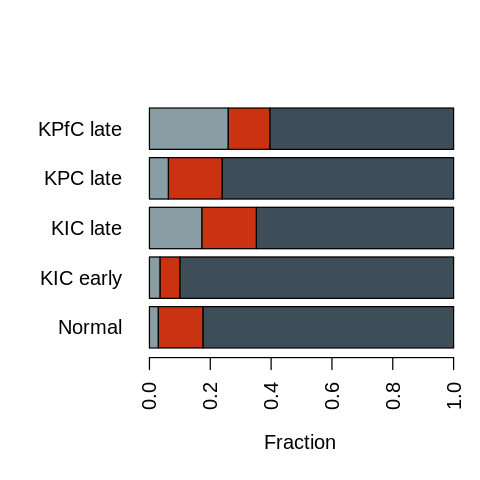

In [37]:
library(wesanderson)
par(mar=c(5,6,4,1)+.1)
options(repr.plot.width=4, repr.plot.height=4)

barplot(mm[, c(5,1,2,3,4)], col = c(wes_palette("Royal1")[1:2], "#3e4e59"), horiz = T,las=2, xlab = "Fraction" )

In [38]:
table(pb$orig.ident[idx])/table(pb$orig.ident)


 kic_early   kic_late        KPC  kpfc_late     normal 
0.05631013 0.08709677 0.04428044 0.21483132 0.08222491 

In [39]:
pb$orig.ident = as.factor(pb$orig.ident)
levels(pb$orig.ident) = c("KIC early", "KIC late", "KPC late", "KPfC late", "Normal")
pb$orig.ident = relevel(pb$orig.ident, ref = "Normal")

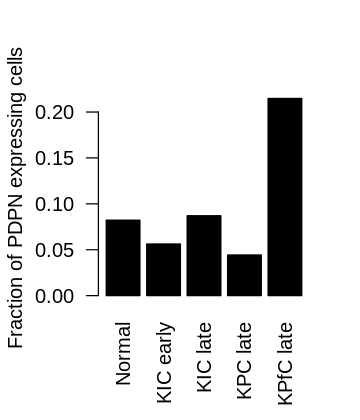

In [40]:
options(repr.plot.width=3, repr.plot.height=3.5)

barplot(table(pb$orig.ident[idx])/table(pb$orig.ident),  col = "Black", ylab = "Fraction of PDPN expressing cells", las = 2)

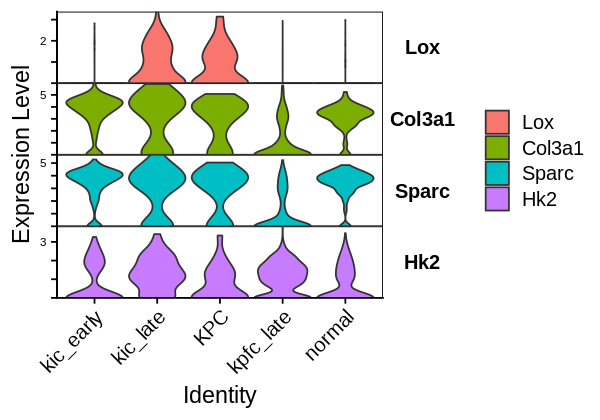

In [41]:
options(repr.plot.width=5, repr.plot.height=3.5)

VlnPlot(pbmc, features = c("Lox", "Col3a1", "Sparc", "Hk2"), group.by = "orig.ident", stack = T, flip = T)